# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df.shape

(2375, 6)

In [4]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [5]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
city_data_df.shape

(120, 3)

In [7]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


## Deliverable 1: Get a Summary DataFrame 

In [8]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(['type']).count()['ride_id']
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(['type']).sum()['driver_count']
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
#  3. Get the total amount of fares for each city type
fare_amount  = pyber_data_df.groupby(['type']).sum()['fare']
fare_amount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df.groupby(['type']).count()['ride_id']
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [12]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = pyber_data_df.groupby(['type']).sum()['fare'] / city_data_df.groupby(['type']).sum()['driver_count']
average_fare_driver 

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides':ride_count,
                                'Total Drivers':driver_count,
                                'Total Fares':fare_amount,
                                'Average Fear per Ride':average_fare_ride,
                                'Averge Fear per Driver':average_fare_driver})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fear per Ride,Averge Fear per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [15]:
#  8. Format the columns.
pyber_summary_df['Total Rides']=pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers']= pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] =pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fear per Ride']= pyber_summary_df['Average Fear per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Averge Fear per Driver']= pyber_summary_df['Averge Fear per Driver'].map('${:,.2f}'.format)

In [16]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fear per Ride,Averge Fear per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [17]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_type_date = pyber_data_df.groupby(['type','date']).sum()[['fare']]
fare_type_date

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [19]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_type_date =fare_type_date.reset_index() 
fare_type_date

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [20]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_type_date_pivot = fare_type_date.pivot( index = 'date', columns = 'type' , values = 'fare')
fare_type_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = fare_type_date_pivot.loc['2019-01-01':'2019-04-29']
df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [22]:
df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [23]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index)

In [24]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [25]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_w = df.resample('w').sum()
df_w

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


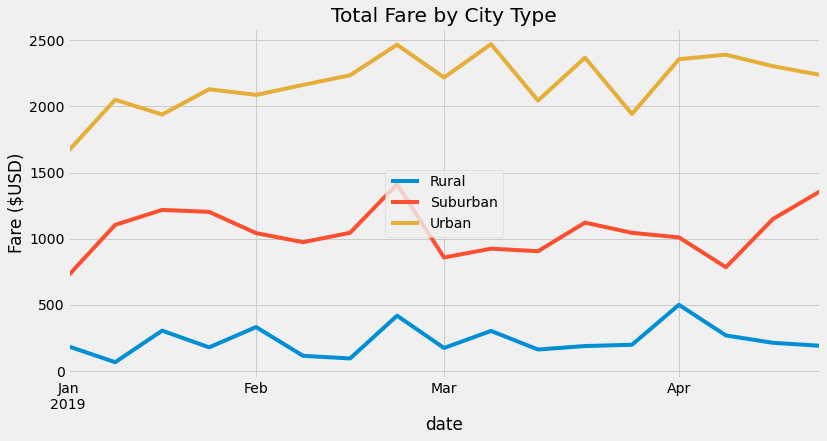

In [32]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df_w.plot(figsize = (12,6))

plt.title('Total Fare by City Type')
plt.ylabel('Fare ($USD)')
plt.legend(loc = 'center')
plt.grid(True)
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

plt.savefig("analysis/Figchallenge.png")
